# Signal Analysis using Fast Fourier Transform

In [1]:
import pandas as pd
from  math import *
from scipy.fftpack import fft
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.pyplot as plt
from scipy import signal
import plotly.plotly as py
import plotly.graph_objs as go

#### Sine Wave generator

In [2]:
def createSignal(T,samples,A,freq):
    temp =[]
    for i in range(samples):
        temp.append(A * sin(2 * pi * freq * i * T))
    return temp

#### Generating signals of different frequencies and amplitudes

In [3]:
# Set the time period
Fs=8000
T = float(1)/float(Fs)
# Number of samples
sample=1000
time_interval = 1.0/1000.0
t = np.arange(0,1,time_interval) # time vector

a = createSignal(T,sample,450,300)
b = createSignal(T,sample,550,550)
c = createSignal(T,sample,620,700)

#### Plot of the input waves

#### Plotting a single sine wave

In [4]:
trace = go.Scatter(
    x = t,
    y = a
)
data = [trace]
py.iplot(data, filename='Sine_Signal')

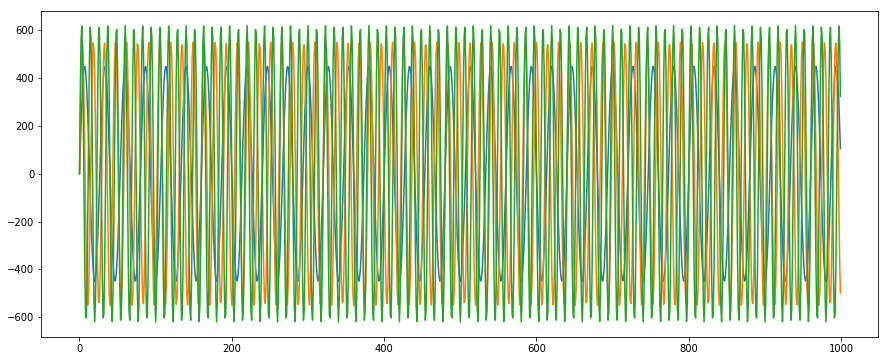

In [5]:
plt.plot(a)
plt.plot(b)
plt.plot(c)

## Working with FFT

#### Generating a resultant signal using convolution operation

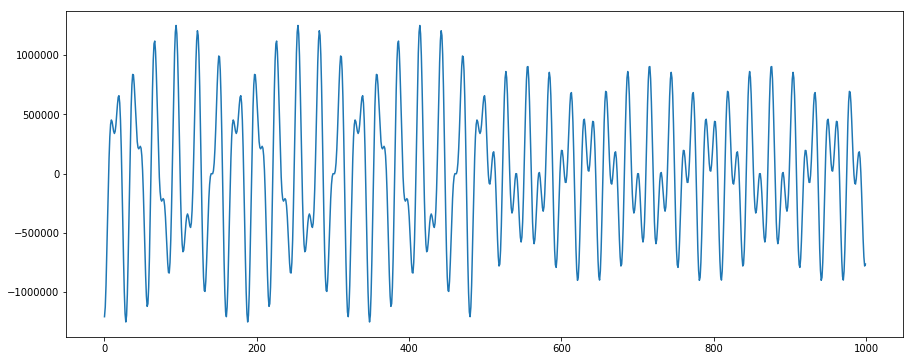

In [6]:
resultant = signal.convolve(a,b, 'same')
plt.plot(resultant)

#### For a purely real input signal of N points you get a complex output of N points with complex conjugate symmetry about N/2. You can ignore the output points above N/2, since they provide no useful additional information for a real input signal, but if you do plot them you will see the aforementioned symmetry, and for a single sine wave you will see peaks at bins n and N - n. (Note: you can think of the upper N/2 bins as representing negative frequencies.) In summary, for a real input signal of N points, you get N/2 useful complex output bins from the FFT, which represent frequencies from DC (0 Hz) to Nyquist (Fs / 2).

In [7]:
fs = np.abs(fft(resultant))
trace = go.Scatter(
    x = range(sample),
    y = fs
)
data = [trace]
py.iplot(data, filename='FFT_Signal_0')

#### Selecting N/2 values to remove redundant data

In [8]:
fs = fs[0 : sample/2]
trace = go.Scatter(
    x = range(sample/2),
    y = fs
)
data = [trace]
py.iplot(data, filename='FFT_Signal_1')

#### Generating a resultant by appending the input waves

In [9]:
d = a + b + c
fs = np.abs(fft(d))
fs = fs[0 : sample/2]
trace = go.Scatter(
    x = range(sample/2),
    y = fs
)
data = [trace]

py.iplot(data, filename='FFT_Signal_2')